In [1]:
import torch as t

##### model parameters

In [6]:
w_1 = t.tensor([0.23], requires_grad = True)
b = t.tensor([0.1], requires_grad = True)


In [7]:
# inputs and targets

x_1 = t.tensor([1.23])
y = t.tensor([1.])

In [8]:
u = x_1 * w_1
z = u + b
print(u, z)

tensor([0.2829], grad_fn=<MulBackward0>) tensor([0.3829], grad_fn=<AddBackward0>)


In [9]:
a = t.sigmoid(z)
a

tensor([0.5946], grad_fn=<SigmoidBackward0>)

In [10]:
import torch.nn.functional as F

In [11]:
l = F.binary_cross_entropy(a, y)
l

tensor(0.5199, grad_fn=<BinaryCrossEntropyBackward0>)

In [12]:
l = F.binary_cross_entropy_with_logits(z, y)
l

tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

### compute gradient

In [13]:
from torch.autograd import grad

In [14]:
grad_L_w1 = grad(l, w_1, retain_graph=True)
grad_L_w1

(tensor([-0.4987]),)

In [15]:
grad_L_b = grad(l, b, retain_graph=True)
grad_L_b

(tensor([-0.4054]),)

In [16]:
l.backward()

In [17]:
w_1.grad

tensor([-0.4987])

In [18]:
b.grad

tensor([-0.4054])

## Logistic Regression

In [19]:
import pandas as pd
df = pd.read_csv('perceptron_toydata-truncated.txt', sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [20]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values
x_train, y_train

(array([[ 0.77, -1.14],
        [-0.33,  1.44],
        [ 0.91, -3.07],
        [-0.37, -1.91],
        [-0.63, -1.53],
        [ 0.39, -1.99],
        [-0.49, -2.74],
        [-0.68, -1.52],
        [-0.1 , -3.43],
        [-0.05, -1.95],
        [ 3.88,  0.65],
        [ 0.73,  2.97],
        [ 0.83,  3.94],
        [ 1.59,  1.25],
        [ 1.14,  3.91],
        [ 1.73,  2.8 ],
        [ 1.31,  1.85],
        [ 1.56,  3.85],
        [ 1.23,  2.54],
        [ 1.33,  2.03]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64))

In [21]:
X_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)

In [22]:
X_train, y_train

(tensor([[ 0.7700, -1.1400],
         [-0.3300,  1.4400],
         [ 0.9100, -3.0700],
         [-0.3700, -1.9100],
         [-0.6300, -1.5300],
         [ 0.3900, -1.9900],
         [-0.4900, -2.7400],
         [-0.6800, -1.5200],
         [-0.1000, -3.4300],
         [-0.0500, -1.9500],
         [ 3.8800,  0.6500],
         [ 0.7300,  2.9700],
         [ 0.8300,  3.9400],
         [ 1.5900,  1.2500],
         [ 1.1400,  3.9100],
         [ 1.7300,  2.8000],
         [ 1.3100,  1.8500],
         [ 1.5600,  3.8500],
         [ 1.2300,  2.5400],
         [ 1.3300,  2.0300]], dtype=torch.float64),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [23]:
X_train = X_train.to(t.float32)

In [24]:
X_train.shape

torch.Size([20, 2])

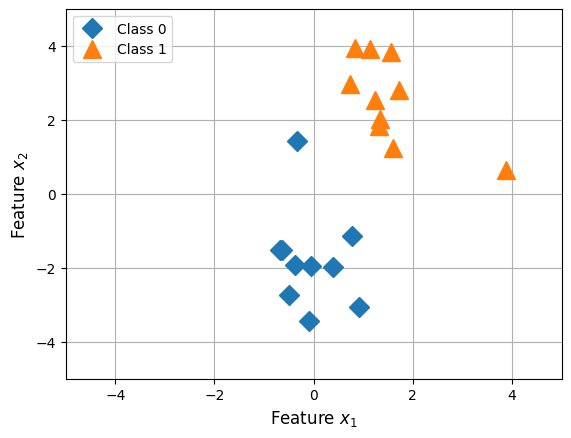

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()

In [26]:
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

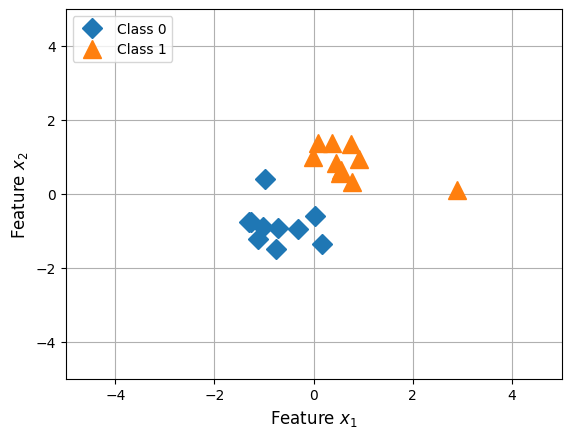

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()

In [60]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0
    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)
    acc = correct/len(all_y)
    return acc, str(acc*100) + "%"

def plot_boundry(model):
    w1, w2 = model.linear.weight[0][0].detach(), model.linear.weight[0][1].detach()
    b = model.linear.bias[0].detach()

    x1_min = -20
    x2_min = ((-w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = ((-w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max
    
def plot_decision(model, x_train, y_train):
    x1_min, x1_max, x2_min, x2_max = plot_boundry(model)


    plt.plot(
        x_train[y_train == 0, 0],
        x_train[y_train == 0, 1],
        marker="D",
        markersize=10,
        linestyle="",
        label="Class 0",
    )
    
    plt.plot(
        x_train[y_train == 1, 0],
        x_train[y_train == 1, 1],
        marker="^",
        markersize=13,
        linestyle="",
        label="Class 1",
    )
    
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
    
    plt.legend(loc=2)
    
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    
    plt.xlabel("Feature $x_1$", fontsize=12)
    plt.ylabel("Feature $x_2$", fontsize=12)
    
    plt.grid()
    plt.show()

In [61]:
class LogisticRegression(t.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = t.nn.Linear(num_features, 1)

    def forward(self, x):
        logits = self.linear(x)
        probabs = t.sigmoid(logits)
        return probabs

def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0
        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)
            # print_values(model)
        
        
        print(f"Epoch {epoch+1} errors {error_count}")
        plot_decision(model, all_x, all_y)
        if error_count == 0:
            train_accuracy, percent_accuract = compute_accuracy(p, all_x, all_y)
            print("\n\n\n")
            print(f"Accuracy = {train_accuracy * 100}%")
            return

In [62]:
t.manual_seed(1)
model = LogisticRegression(num_features = 2)

In [35]:
x = t.tensor([1.1, 2.1])
with t.inference_mode():
    proba = model(x)
proba

tensor([0.4033])

In [36]:
from torch.utils.data import Dataset, DataLoader

In [63]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.features = t.tensor(X, dtype=t.float32)
        self.labels = t.tensor(y, dtype=t.float32)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y

    def __len__(self):
        return self.labels.shape[0]

train_ds = MyDataset(X_train, y_train)

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 10,
    shuffle = True
)

C:\Users\Subodh Bijwe\AppData\Local\Temp\ipykernel_26748\1638472622.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = t.tensor(X, dtype=t.float32)
C:\Users\Subodh Bijwe\AppData\Local\Temp\ipykernel_26748\1638472622.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = t.tensor(y, dtype=t.float32)


In [64]:
import torch.nn.functional as F

In [65]:
num_epochs = 20

Epoch: 001/020 | Batch 000/002 | Loss: 0.67
Epoch: 001/020 | Batch 001/002 | Loss: 0.72


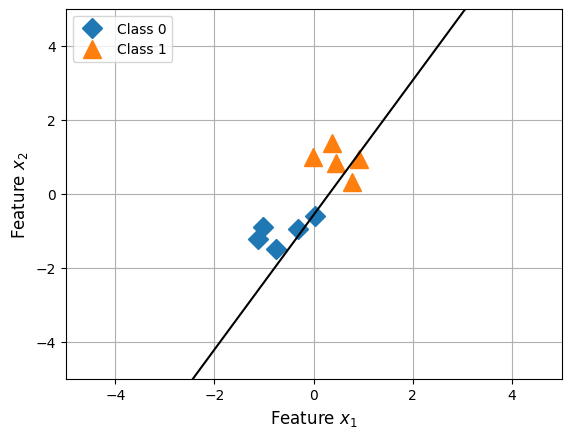

Epoch: 002/020 | Batch 000/002 | Loss: 0.65
Epoch: 002/020 | Batch 001/002 | Loss: 0.64


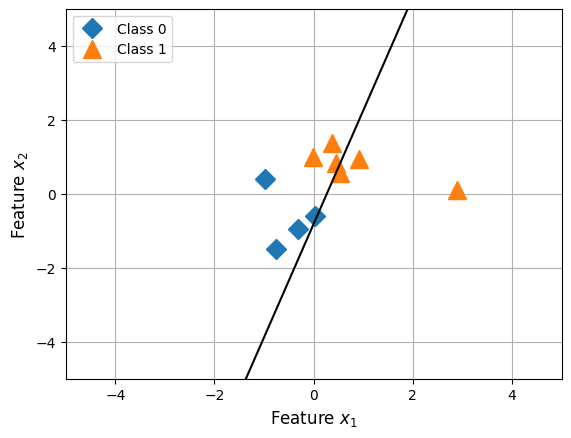

Epoch: 003/020 | Batch 000/002 | Loss: 0.56
Epoch: 003/020 | Batch 001/002 | Loss: 0.63


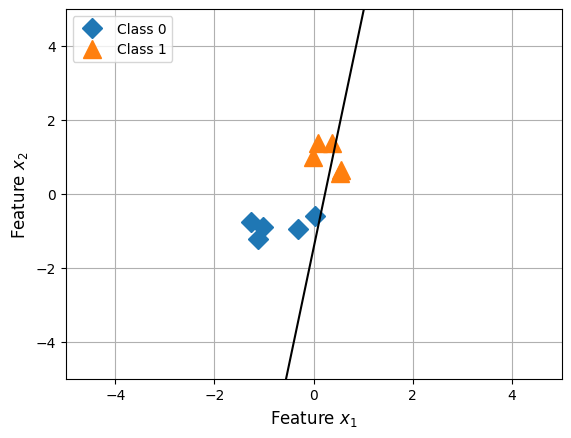

Epoch: 004/020 | Batch 000/002 | Loss: 0.63
Epoch: 004/020 | Batch 001/002 | Loss: 0.48


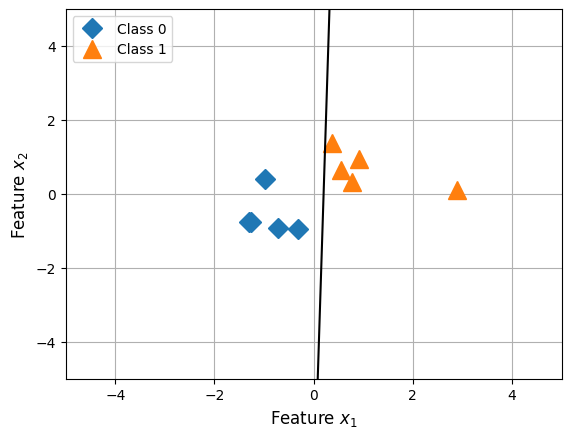

Epoch: 005/020 | Batch 000/002 | Loss: 0.54
Epoch: 005/020 | Batch 001/002 | Loss: 0.50


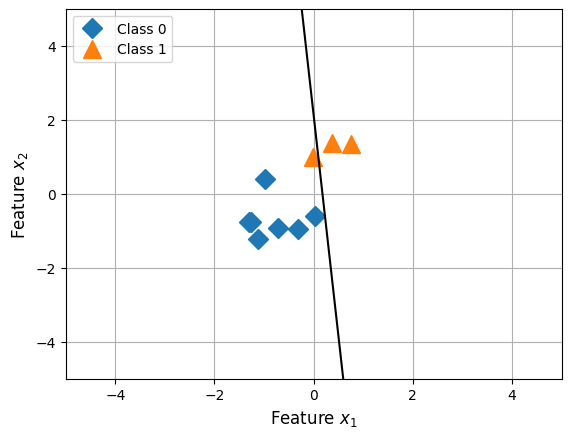

Epoch: 006/020 | Batch 000/002 | Loss: 0.50
Epoch: 006/020 | Batch 001/002 | Loss: 0.48


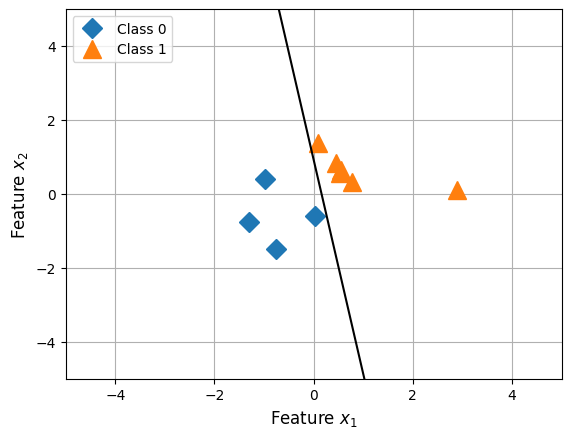

Epoch: 007/020 | Batch 000/002 | Loss: 0.44
Epoch: 007/020 | Batch 001/002 | Loss: 0.48


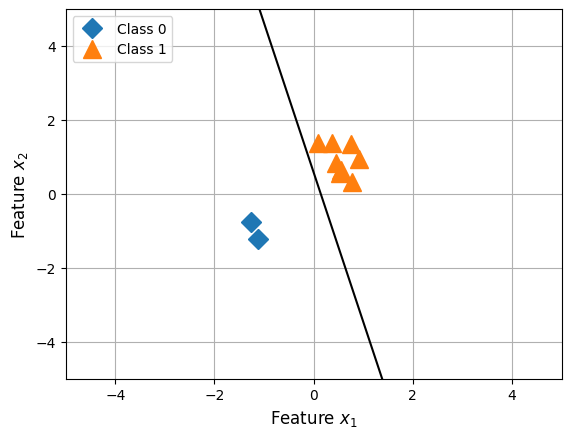

Epoch: 008/020 | Batch 000/002 | Loss: 0.43
Epoch: 008/020 | Batch 001/002 | Loss: 0.44


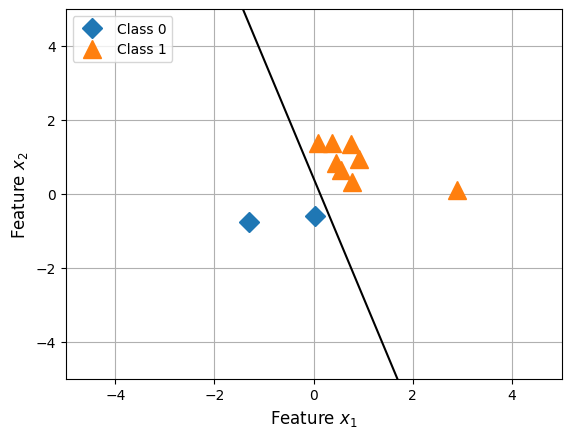

Epoch: 009/020 | Batch 000/002 | Loss: 0.41
Epoch: 009/020 | Batch 001/002 | Loss: 0.41


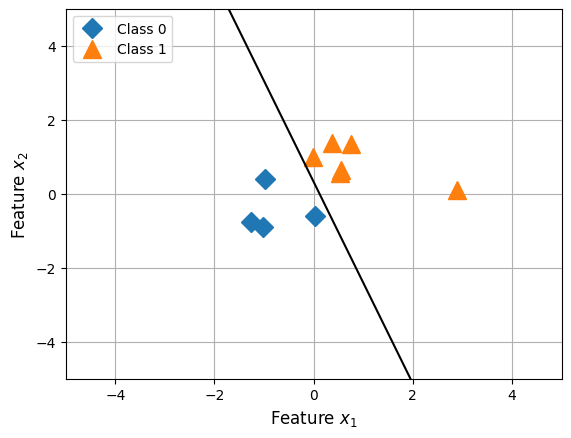

Epoch: 010/020 | Batch 000/002 | Loss: 0.43
Epoch: 010/020 | Batch 001/002 | Loss: 0.35


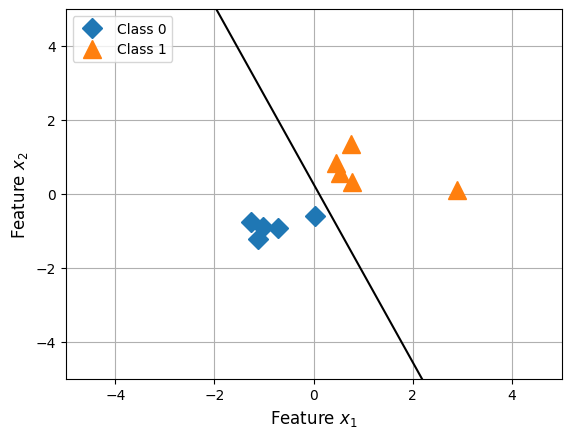

Epoch: 011/020 | Batch 000/002 | Loss: 0.32
Epoch: 011/020 | Batch 001/002 | Loss: 0.42


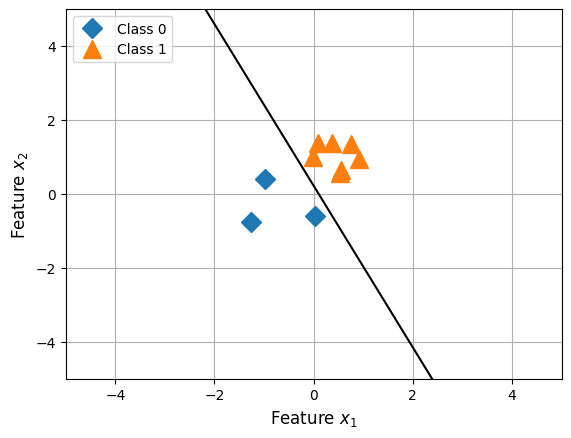

Epoch: 012/020 | Batch 000/002 | Loss: 0.36
Epoch: 012/020 | Batch 001/002 | Loss: 0.35


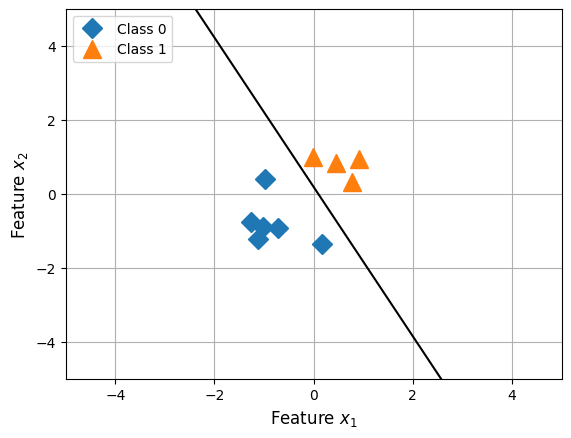

Epoch: 013/020 | Batch 000/002 | Loss: 0.36
Epoch: 013/020 | Batch 001/002 | Loss: 0.31


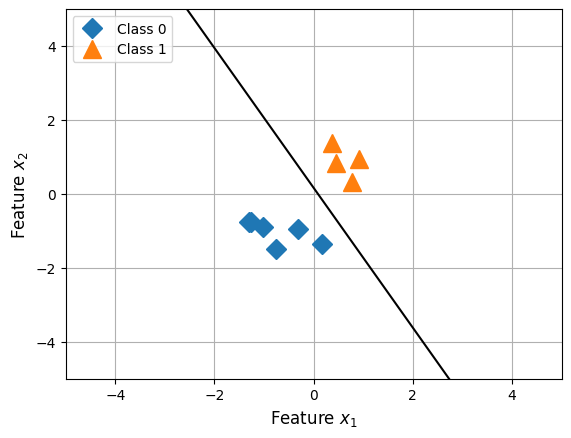

Epoch: 014/020 | Batch 000/002 | Loss: 0.30
Epoch: 014/020 | Batch 001/002 | Loss: 0.34


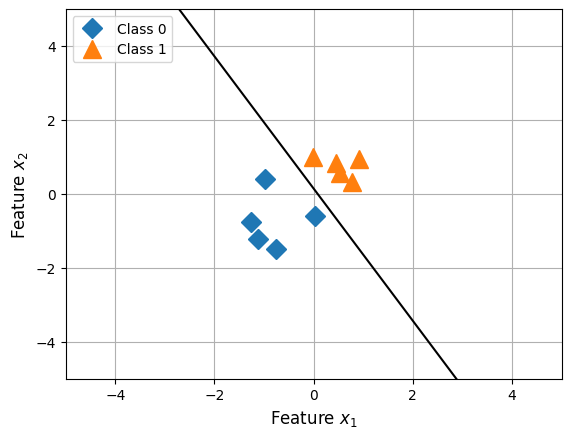

Epoch: 015/020 | Batch 000/002 | Loss: 0.32
Epoch: 015/020 | Batch 001/002 | Loss: 0.29


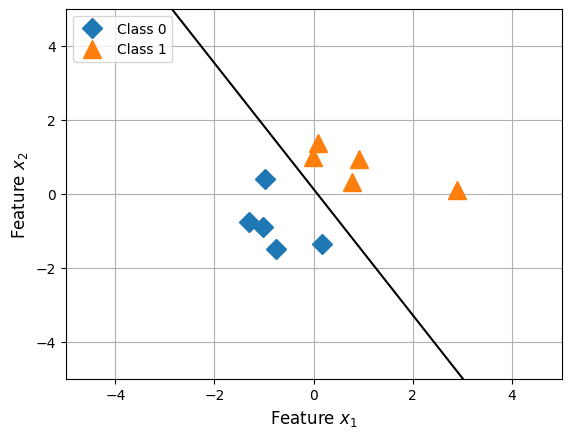

Epoch: 016/020 | Batch 000/002 | Loss: 0.30
Epoch: 016/020 | Batch 001/002 | Loss: 0.29


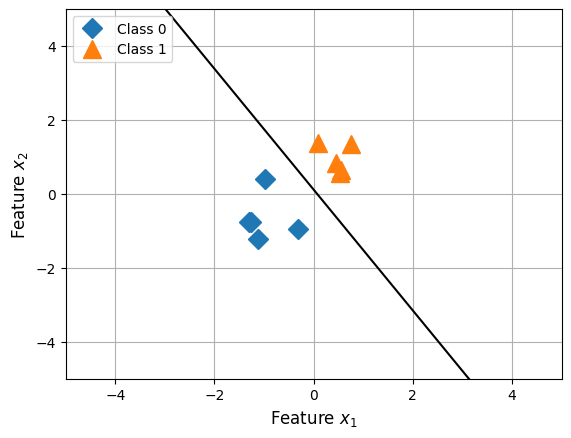

Epoch: 017/020 | Batch 000/002 | Loss: 0.27
Epoch: 017/020 | Batch 001/002 | Loss: 0.30


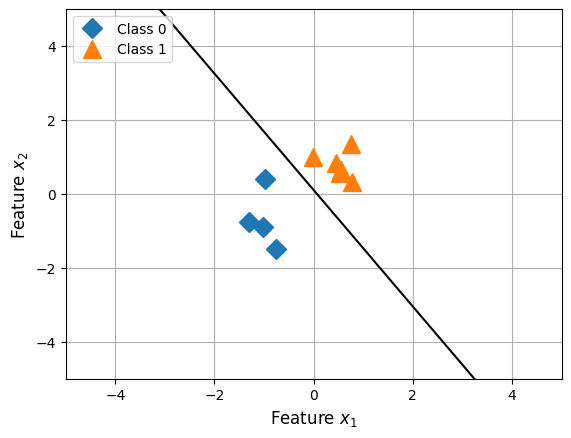

Epoch: 018/020 | Batch 000/002 | Loss: 0.33
Epoch: 018/020 | Batch 001/002 | Loss: 0.22


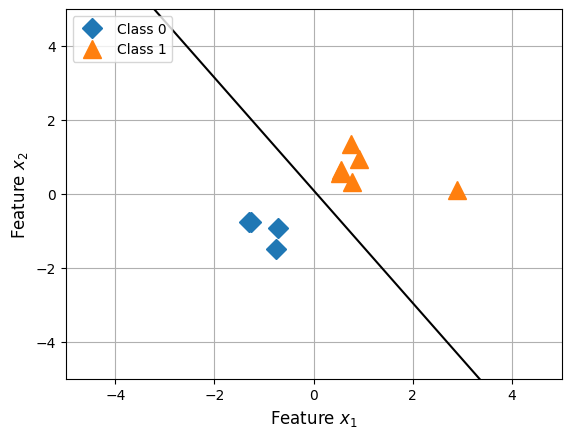

Epoch: 019/020 | Batch 000/002 | Loss: 0.26
Epoch: 019/020 | Batch 001/002 | Loss: 0.28


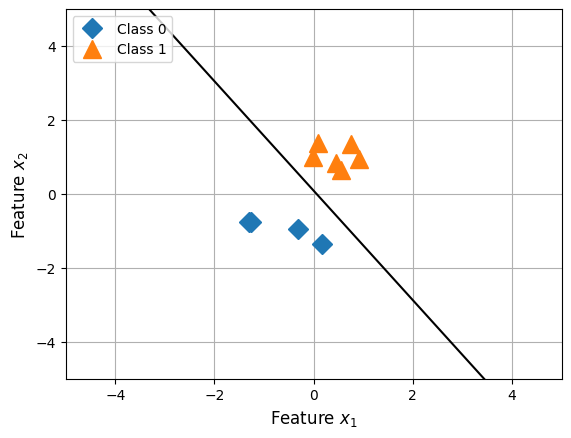

Epoch: 020/020 | Batch 000/002 | Loss: 0.23
Epoch: 020/020 | Batch 001/002 | Loss: 0.29


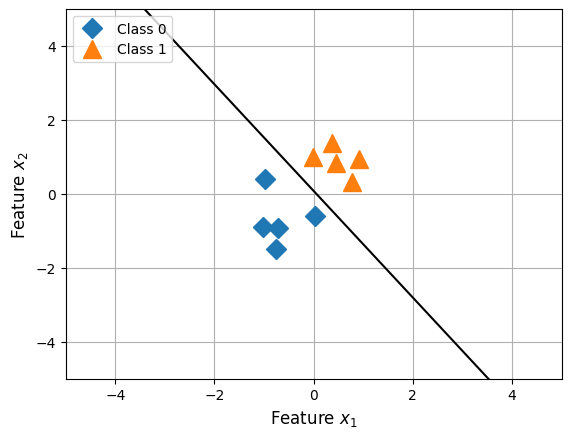

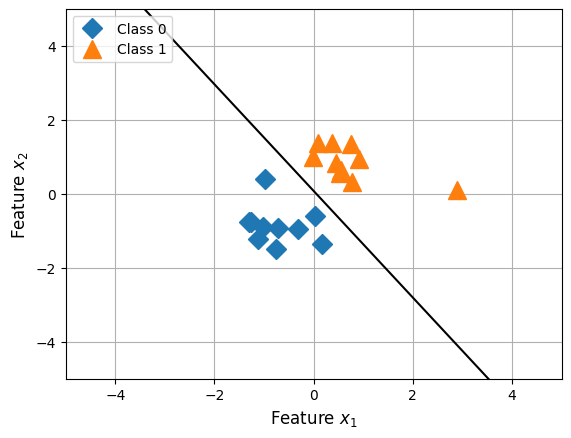

In [71]:
t.manual_seed(1)
model = LogisticRegression(num_features=2)
optimizer = t.optim.SGD(model.parameters(), lr = 0.09)
for epoch in range(num_epochs):
    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_loader):
        probas = model(features)
        loss = F.binary_cross_entropy(probas, class_labels.view(probas.shape))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Logging
        print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
             f' | Batch {batch_idx:03d}/{len(train_loader):03d}'
             f' | Loss: {loss:.2f}')
    plot_decision(model, features, class_labels)



In [54]:
probas

tensor([[0.9276],
        [0.9853],
        [0.0082],
        [0.9877],
        [0.0033],
        [0.9165],
        [0.1979],
        [0.9547],
        [0.1712],
        [0.0156]], grad_fn=<SigmoidBackward0>)

In [53]:
pred = t.where(probas > 0.5, 1, 0)
pred

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [55]:
class_labels.view(pred.shape).to(pred.dtype)

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [56]:
class_labels

tensor([1., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

In [57]:
def compute_accuracy(model, dataloader):
    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, class_labels) in enumerate(dataloader):
        with t.no_grad():
            probas = model(features)

        pred = t.where(probas > 0.5, 1, 0)
        lab = class_labels.view(pred.shape).to(pred.dtype)

        compare = lab == pred
        correct += t.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [58]:
train_accuracy = compute_accuracy(model, train_loader)

In [59]:
print(f"Accuracy: {train_accuracy *100}%")

Accuracy: 100.0%


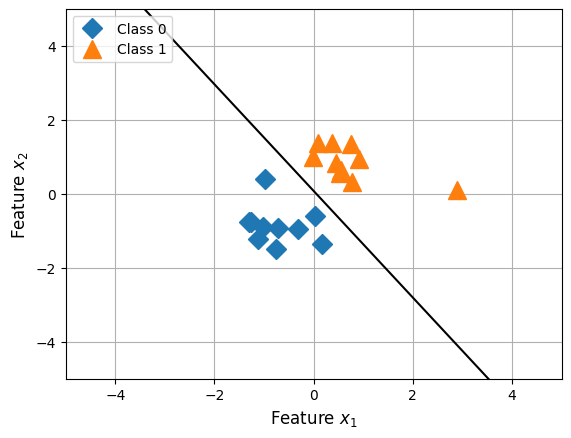

In [72]:
plot_decision(model, X_train, y_train)

In [73]:
def normalize(df, train_min, train_max):
    return (df - train_min) / (train_max, train_min)

train_min, train_max = df_train.min(), df_train.max()

In [ ]:
# to be used with SGD

def standardize(df, train_mean, train_std):
    return (df - train_mean) / train_std

train_mean, train_std = df_train.mean(), df_train.std()
